# Los Átomos de la Computación

## Circuitos

En la computación clásica, representamos las operaciónes lógicas a partir de 
circuitos lógicos representados en diagramas como el de la figura de la izquierda.
De manera análoga, en la computación cuántica usamos "circuitos cuánticos" para
representar las operaciones lógicas que se realizan sobre los qubits.

<table>
<tr>
<th> Clásico </th>
<th> Cuántico </th>
</tr>
<tr>
<td>

<img align="center" src="img/Circuitos_Clasicos.png" alt="CircuitoLogico" 
        width="300"/>

</td>
<td>

<img align="center" src="img/Circuitos_Cuanticos.png" alt="CircuitoCuantico" 
        width="300"/>

</td>
</tr>
</table>


### Creando un circuito cuántico con Qiskit

Para crear un circuito cuántico en Qiskit, primero importamos la librería Quantum
Circuit de Qiskit.

Podemos especificar cuántos qubits debería tener nuestro circuito, y 
opcionalmente también podemos indicar cuántos bits clásicos debería tener.
Necesitamos bits clásicos para almacenar las mediciones de nuestros qubits, 
la razón de esto se hará más clara más adelante.

Habitualmente hay 3 pasos que tenemos que dar:
1. Codificar el input
2. Llevar a cabo los cálculos
3. Extraer el output

Procedimiento:
1. **Crear un circuito** cuántico con 3 qubits y 3 bits clásicos
2. Indicarle a nuestro ordenador cuántico que **mida nuestros
qubits y registre los resultados**. Para hacer esto, agregamos una operación de 
"medición" a nuestro circuito cuántico.

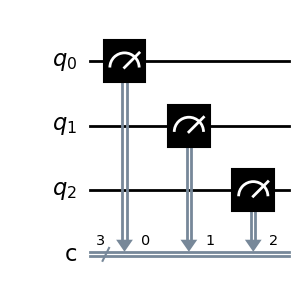

In [44]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw(output='mpl')

A continuación, veamos cuáles serían los resultados de ejecutar este circuito. 

Para hacerlo, utilizaremos un:

**simulador cuántico**: máquina estándar que calcula lo que haría una computadora cuántica ideal.

In [45]:
from qiskit.providers.aer import AerSimulator
sim = AerSimulator()  # make new simulator object

Esto devolverá un objeto job que contiene información sobre los resultados de la
ejecución.

In [46]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

Nos  devuelve un diccionario de la forma {"output": Número de veces obtenido}

- ¿Por qué 000?
Por defecto todos los qbits están en 0 y no hemos hecho nada sobre ellos

- ¿Por qué 1024?
Por defecto hace 1024 mediciones en el simulador

## Codificando un output

Usamos una puerta NOT, que en quantum se representa con una *X-gate*, para 
cambiar las salidas del circuito de manera que obtengamos un número en binario
representado con 3 bits clásicos.

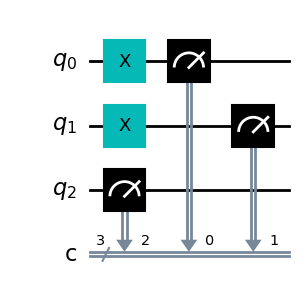

In [48]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([0, 1])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw(output="mpl")    # returns a drawing of the circuit

In [49]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'011': 1024}

De esta manera, usando puertas cuánticas, podemos codificar cualquier número.
En este caso, hemos codificado el número 5.

#### Ejercicio 1: Codifica el número 6

El 6 en binario es 110. Para codificarlo, necesitamos cambiar el segundo y tercer
qubit.

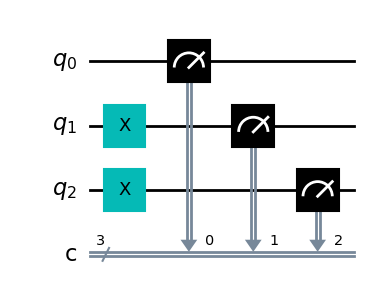

In [50]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([1, 2])  # Perform X-gates on qubits 0
qc.measure([0,1,2], [0,1,2])
qc.draw(output="mpl")    # returns a drawing of the circuit

In [11]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'110': 1024}

## Circuito Suma

En binario, se cumple la siguiente regla para la suma (half-adder):

$$
0 + 0 = 00 \\
0 + 1 = 01 \\
1 + 0 = 01 \\
1 + 1 = 10
$$

Vamos a construirlo con cicuitos cuánticos. Nuestro objetivo es completar la imagen
siguiente:

<p align="center">
<img src="img/HalfAdder_empty.png" alt="Semisumador" 
        width="500"/>
</p>

Nos ayudaremos de una puerta XOR o CNOT, que en quantum se representa con una
puerta *cx*. Su tabla de verdad es la siguiente:

| Input 1 | Input 2 | Output |
|:-------:|:-------:|:------:|
|    0    |    0    |    0   |
|    0    |    1    |    1   |
|    1    |    0    |    1   |
|    1    |    1    |    0   |

En los diagramas de circuitos, se representa de la siguiente manera. 

Esto se aplica a un par de qubits:

- Uno actúa como el qubit de control (este es el que tiene el puntito).
- El otro actúa como el qubit target (con el círculo grande y una cruz, como una marca de target).

<p align="center">
<img src="img/CNOT_Quant.png" alt="CNOT" 
        width="300"/>
</p>

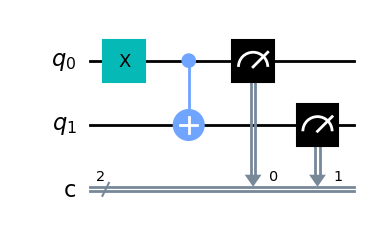

Result:  {'11': 1024}


In [51]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw(output='mpl'))     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

**Nota**: El primer qubit se fija en 1 con la X-gate, el segundo qubit  vale 0 
por defecto. Al aplicar el CNOT, 0 XOR 1 = 1, por lo que el segundo qubit (target)
cambia a 1.

En el siguiente ejemplo tenemos un  1 XOR 1 que deberia ser 0. Por lo tanto, el 
output debe ser 01.


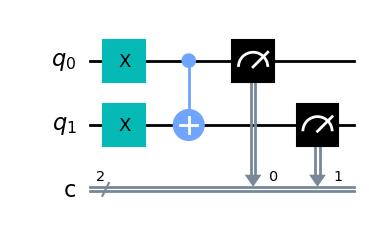

Result:  {'01': 1024}


In [52]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.x(1)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw(output='mpl'))     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

### Ennsamblado de salidas

Con esta puerta XOR podemos generar todas las posibles combnaciones de input 1
y de input 2. Para ello nos apoyamos en un qubit de apoyo que por defecto vale 0.


De esta manera, 

- si no negamos nada, la salida será 0.
- si negamos q0, la salida será 1.
- si negamos q1, la salida será 1.
- si negamos q0 y q1, la salida será 0.

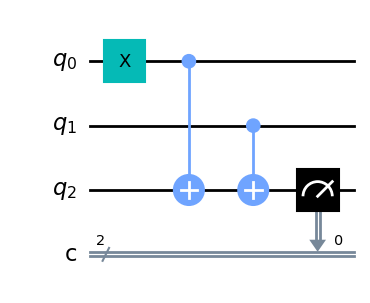

Result:  {'01': 1024}


In [53]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)
# qc.x(1)
qc.x(0)
qc.cx(0,2)  # CNOT controlled by qubit 0 and targeting qubit 2
qc.cx(1, 2)  # CNOT controlled by qubit 0 and targeting qubit 2

qc.measure(2, 0)
display(qc.draw(output='mpl'))     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

Entonces ahora tenemos que obtener una puerta que solo sea 0 cuando los dos sean 1.

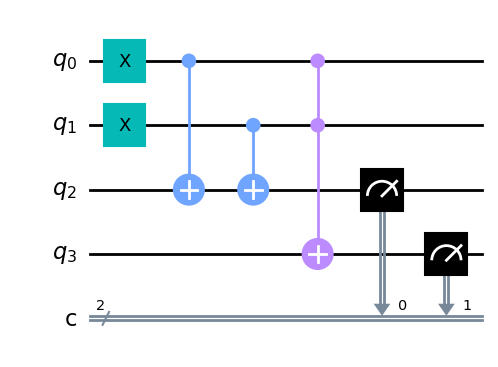

{'10': 1024}

In [43]:
test_qc = QuantumCircuit(4, 2)

# First, our circuit should encode an input (here '11')
test_qc.x(0)
test_qc.x(1)

# Next, it should carry out the adder circuit we created
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# Finally, we will measure the bottom two qubits to extract the output
test_qc.measure(2,0)
test_qc.measure(3,1)
display(test_qc.draw(output="mpl"))

job = sim.run(test_qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()     # interpret the results as a “counts” dictionary